<a href="https://colab.research.google.com/github/sanjanalad99/Mental-Health-in-Tech/blob/main/Mental_Health_in_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os

In [16]:
directory_path = os.path.dirname("/content/survey.csv")

In [18]:
df = pd.read_csv("/content/survey.csv")

In [19]:
df.shape

(1259, 27)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [21]:
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [22]:
self_employed_percent = (df["self_employed"].isnull().sum()/len(df["self_employed"]))*100
work_interfere_percent = (df["work_interfere"].isnull().sum()/len(df["work_interfere"]))*100

print(f"The percentage of missing values in self_employed column is {round(self_employed_percent, 2)}%")
print(f"The percentage of missing values in work_interfere column is {round(work_interfere_percent, 2)}%")

The percentage of missing values in self_employed column is 1.43%
The percentage of missing values in work_interfere column is 20.97%


In [23]:
df["self_employed"] = df["self_employed"].fillna(df["self_employed"].mode()[0])

df["work_interfere"] = df["work_interfere"].fillna(df["work_interfere"].mode()[0])

In [24]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,No,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,No,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [25]:
df.drop(["state", "comments"], axis=1, inplace=True)

In [26]:
df.isna().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [27]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

<ipython-input-28-970c52ff11fd>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


[Text(0, 0, 'United States'),
 Text(1, 0, 'Canada'),
 Text(2, 0, 'United Kingdom'),
 Text(3, 0, 'Bulgaria'),
 Text(4, 0, 'France'),
 Text(5, 0, 'Portugal'),
 Text(6, 0, 'Netherlands'),
 Text(7, 0, 'Switzerland'),
 Text(8, 0, 'Poland'),
 Text(9, 0, 'Australia'),
 Text(10, 0, 'Germany'),
 Text(11, 0, 'Russia'),
 Text(12, 0, 'Mexico'),
 Text(13, 0, 'Brazil'),
 Text(14, 0, 'Slovenia'),
 Text(15, 0, 'Costa Rica'),
 Text(16, 0, 'Austria'),
 Text(17, 0, 'Ireland'),
 Text(18, 0, 'India'),
 Text(19, 0, 'South Africa'),
 Text(20, 0, 'Italy'),
 Text(21, 0, 'Sweden'),
 Text(22, 0, 'Colombia'),
 Text(23, 0, 'Latvia'),
 Text(24, 0, 'Romania'),
 Text(25, 0, 'Belgium'),
 Text(26, 0, 'New Zealand'),
 Text(27, 0, 'Zimbabwe'),
 Text(28, 0, 'Spain'),
 Text(29, 0, 'Finland'),
 Text(30, 0, 'Uruguay'),
 Text(31, 0, 'Israel'),
 Text(32, 0, 'Bosnia and Herzegovina'),
 Text(33, 0, 'Hungary'),
 Text(34, 0, 'Singapore'),
 Text(35, 0, 'Japan'),
 Text(36, 0, 'Nigeria'),
 Text(37, 0, 'Croatia'),
 Text(38, 0, 'Norway

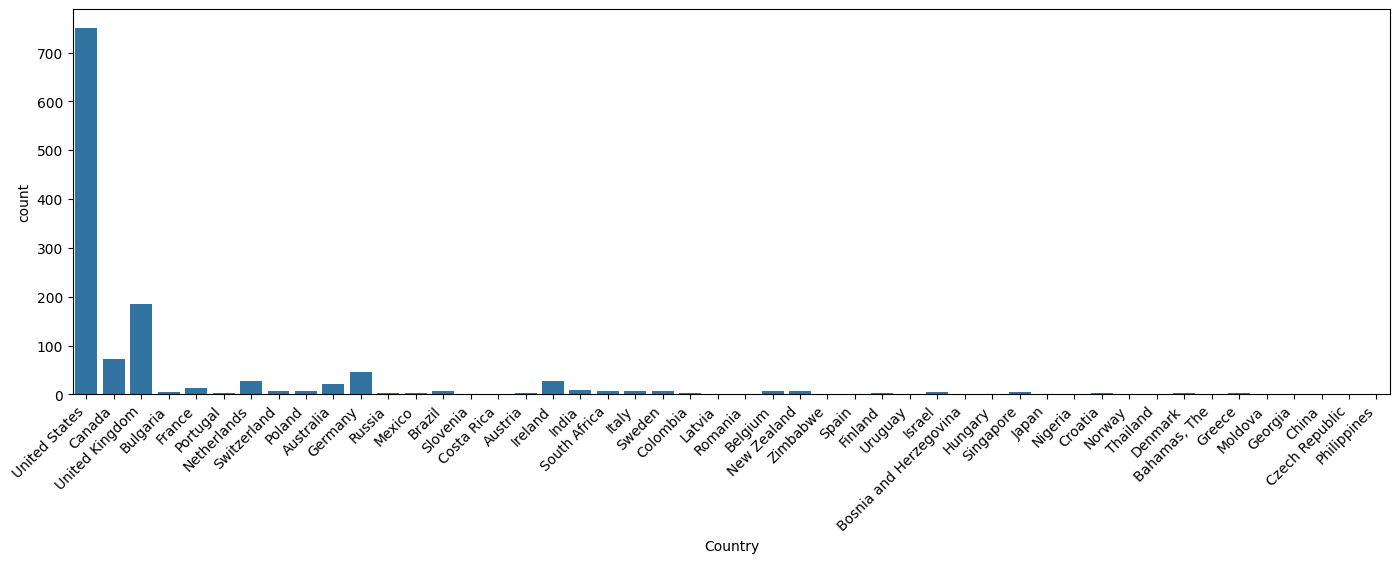

In [28]:
plt.figure(figsize=(17,5))
ax = sns.countplot(x='Country', data=df)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [29]:
min_age = df["Age"].min()
max_age = df["Age"].max()
mean_age = df["Age"].mean()
median_age = df["Age"].median()

print(f"Min: {min_age}, \nMax: {max_age}, \nMean: {mean_age}, \nMedian: {median_age}")

Min: -1726, 
Max: 99999999999, 
Mean: 79428148.31135821, 
Median: 31.0


In [30]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [32]:
negative_age = (df["Age"]<0).sum()
over_age = (df["Age"]>80).sum()

print(f"Number of negative age entries: {negative_age}\nNumber of overage: {over_age}")

Number of negative age entries: 3
Number of overage: 2


In [33]:
df.loc[df.Age<0, ["Age"]] = df["Age"].median()
df.loc[df.Age>80, ["Age"]] = df["Age"].median()

In [34]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [35]:
df.loc[df.Age<18, ["Age"]] = df["Age"].median()

<Axes: >

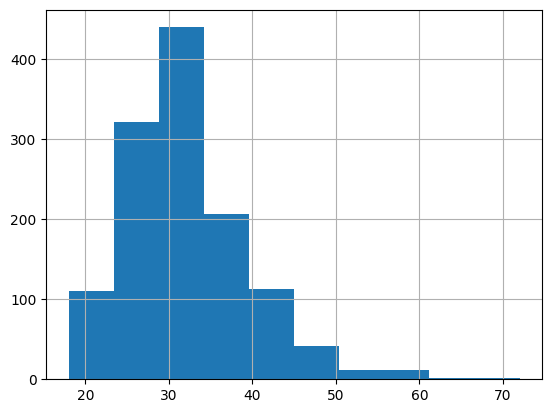

In [36]:
df["Age"].hist()

<Axes: xlabel='Age'>

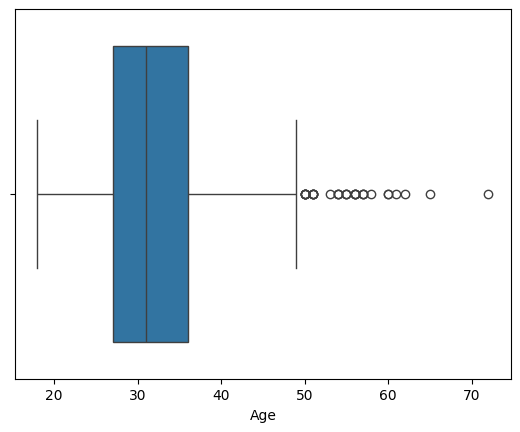

In [37]:
sns.boxplot(x=df["Age"])

In [38]:
import statistics

variance_age = df["Age"].var()
standard_dev_age = statistics.stdev(df["Age"])

print(f"Mean: {round(mean_age, 2)}"
      f"\nVariance: {round(variance_age, 2)}"
      f"\nStandard Deviation: {round(standard_dev_age, 2)}")

Mean: 79428148.31
Variance: 52.79
Standard Deviation: 7.27


<ipython-input-39-aa38540b9b9d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


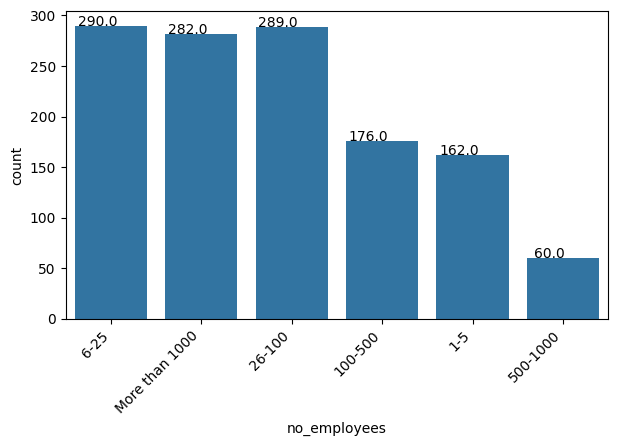

In [39]:
plt.figure(figsize=(7,4))
ax = sns.countplot(x='no_employees', data=df)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')
# Then we also display the values for each bar above it;
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

<ipython-input-40-da997a31e408>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


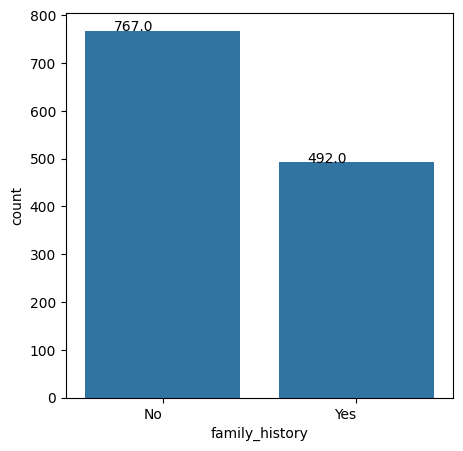

In [40]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='family_history', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

<ipython-input-41-2e86862b9c3f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


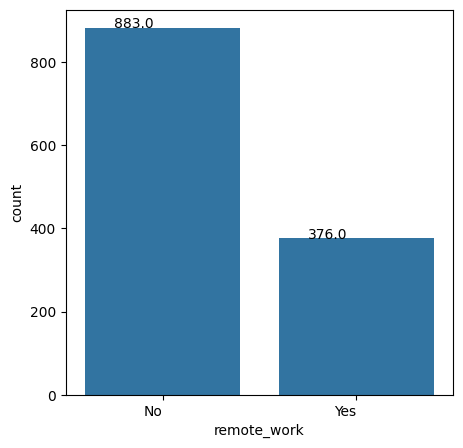

In [41]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='remote_work', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

<ipython-input-42-5a166a500725>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


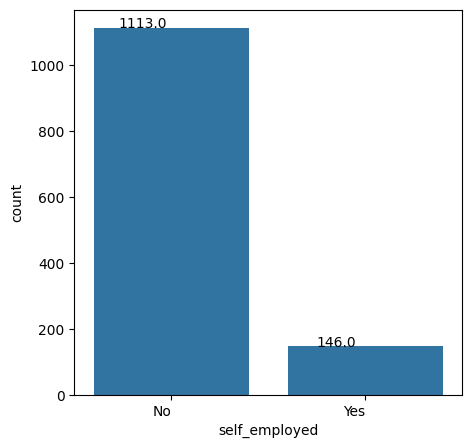

In [42]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='self_employed', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

<ipython-input-44-4ed3ad58c079>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


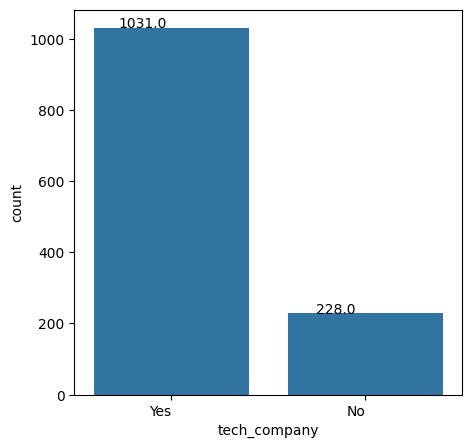

In [44]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='tech_company', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

In [45]:
df["Timestamp"].head()

0    2014-08-27 11:29:31
1    2014-08-27 11:29:37
2    2014-08-27 11:29:44
3    2014-08-27 11:29:46
4    2014-08-27 11:30:22
Name: Timestamp, dtype: object

In [46]:
df_year = pd.to_datetime(df["Timestamp"]).dt.year
df_year.head()

0    2014
1    2014
2    2014
3    2014
4    2014
Name: Timestamp, dtype: int64

<ipython-input-47-d980b7074fdd>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),


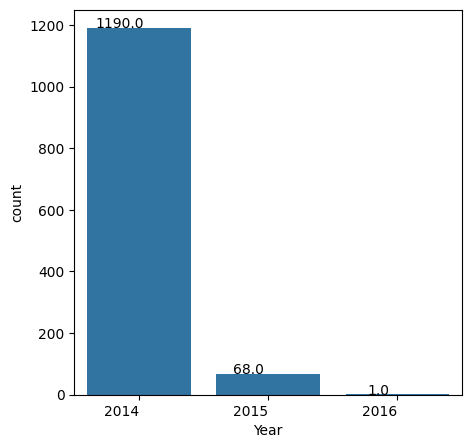

In [47]:
df["Year"] = df_year

plt.figure(figsize=(5,5))
ax = sns.countplot(x='Year', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

In [48]:
df.describe()

,Age,Year
count,1259.000000,1259.00000
mean,32.069897,2014.05560
std,7.265565,0.23268
min,18.000000,2014.00000
25%,27.000000,2014.00000
50%,31.000000,2014.00000
75%,36.000000,2014.00000
max,72.000000,2016.00000


In [49]:
print(f'Family History Unique Entries: {df["family_history"].unique()}')

Family History Unique Entries: ['No' 'Yes']


In [50]:
df["family_history_num"] = df["family_history"].map({"No": 0, "Yes": 1})

In [51]:
df[["family_history", "family_history_num"]].head()

,family_history,family_history_num
0,No,0
1,No,0
2,No,0
3,Yes,1
4,No,0


In [52]:
print(f'Self Employed Unique Entries: {df["self_employed"].unique()}'
      f'\nTreatment Unique Entries: {df["treatment"].unique()}'
      f'\nRemote Work Unique Entries: {df["remote_work"].unique()}'
      f'\nBenefits Unique Entries: {df["benefits"].unique()}'
      f'\nWellness Program Unique Entries: {df["wellness_program"].unique()}'
      f'\nSeek Help Unique Entries: {df["seek_help"].unique()}'
      f'\nAnonymity Unique Entries: {df["anonymity"].unique()}'
      f'\nMental Health Consequence Unique Entries: {df["mental_health_consequence"].unique()}'
      f'\nPhy. Health Consequence Unique Entries: {df["phys_health_consequence"].unique()}')


Self Employed Unique Entries: ['No' 'Yes']
Treatment Unique Entries: ['Yes' 'No']
Remote Work Unique Entries: ['No' 'Yes']
Benefits Unique Entries: ['Yes' "Don't know" 'No']
Wellness Program Unique Entries: ['No' "Don't know" 'Yes']
Seek Help Unique Entries: ['Yes' "Don't know" 'No']
Anonymity Unique Entries: ['Yes' "Don't know" 'No']
Mental Health Consequence Unique Entries: ['No' 'Maybe' 'Yes']
Phy. Health Consequence Unique Entries: ['No' 'Yes' 'Maybe']


In [53]:
df["self_employed_num"] = df["self_employed"].map({"No": 0, "Yes": 1})
df["treatment_num"] = df["treatment"].map({"No": 0, "Yes": 1})
df["remote_work_num"] = df["remote_work"].map({"No": 0, "Yes": 1})
df["benefits_num"] = df["benefits"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["wellness_programs_num"] = df["wellness_program"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["seek_help_num"] = df["seek_help"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["anonymity_num"] = df["anonymity"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["mental_health_consequence_num"] = df["mental_health_consequence"].map({"No": 0, "Yes": 1, "Maybe": 2})
df["phys_health_consequence_num"] = df["phys_health_consequence"].map({"No": 0, "Yes": 1, "Maybe": 2})

In [54]:
df1 = pd.DataFrame() # Empty dataframe

df1["Year"] = df["Year"]
df1["self_employed_num"] = df["self_employed_num"]
df1["treatment_num"] = df["treatment_num"]
df1["remote_work_num"] = df["remote_work_num"]
df1["benefits_num"] = df["benefits_num"]
df1["wellness_programs_num"] = df["wellness_programs_num"]
df1["seek_help_num"] = df["seek_help_num"]
df1["anonymity_num"] = df["anonymity_num"]
df1["mental_health_consequence_num"] = df["mental_health_consequence_num"]
df1["phys_health_consequence_num"] = df["phys_health_consequence_num"]

<Axes: >

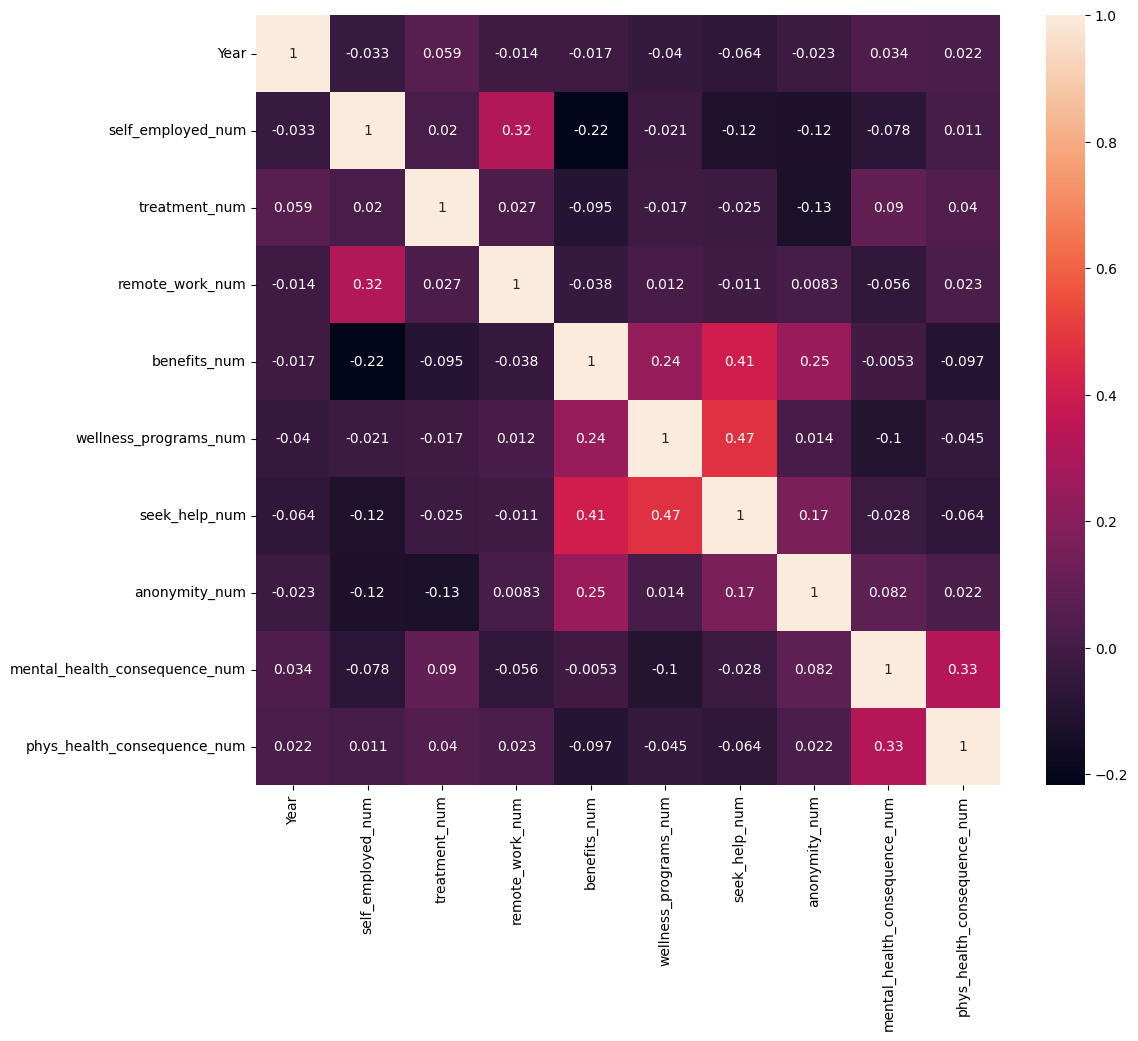

In [55]:
plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True)